1.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import textwrap

In [2]:
pd.read_csv(
    "https://vincentarelbundock.github.io/Rdatasets/csv/dplyr/storms.csv", nrows=10
)

,rownames,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN
5,6,Amy,1975,6,28,6,32.4,-78.7,tropical depression,NaN,25,1012,NaN,NaN
6,7,Amy,1975,6,28,12,33.3,-78.0,tropical depression,NaN,25,1011,NaN,NaN
7,8,Amy,1975,6,28,18,34.0,-77.0,tropical depression,NaN,30,1006,NaN,NaN
8,9,Amy,1975,6,29,0,34.4,-75.8,tropical storm,NaN,35,1004,NaN,NaN
9,10,Amy,1975,6,29,6,34.0,-74.8,tropical storm,NaN,40,1002,NaN,NaN


In [3]:
#
import requests

url = "https://api.ons.gov.uk/timeseries/JP9Z/dataset/UNEM/data"

response = requests.get(url)

print(f"请求状态码: {response.status_code}")
print(f"返回的原始内容: {response.text}")
#The interface API is no longer available, so I can't get the data at all!

请求状态码: 404
返回的原始内容: This API is being decommissioned as part of a suite of work to improve the digital products and services we offer. It is planned to be fully retired on 25/11/2024. If you have any queries please contact us at apiservice@ons.gov.uk.



For the above, I made changes to the code. Using the FRED API key, query series_id=“LMJVTTUVGBM647S”, which is the series number of the UK job vacancies (in thousands).167ccd5ae95c579ae64d6b1295c563feThis is Jie Xu's FRED API KEY

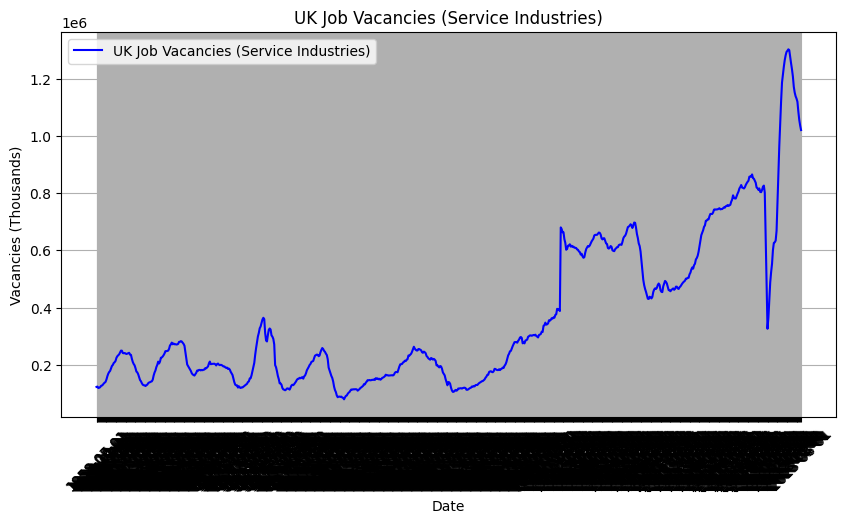

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 替换为你的 FRED API key
api_key = "167ccd5ae95c579ae64d6b1295c563fe"
url = f"https://api.stlouisfed.org/fred/series/observations?series_id=LMJVTTUVGBM647S&api_key={api_key}&file_type=json"

response = requests.get(url)
data = response.json()['observations']

# 提取日期和职位空缺数量，过滤掉非数字数据
dates = [item['date'] for item in data]
values = []
for item in data:
    try:
        values.append(float(item['value']))
    except ValueError:
        values.append(None)  # 使用 None 表示无效数据

# 创建 DataFrame 并去除无效数据
df = pd.DataFrame({'Date': dates, 'Vacancies': values})
df.dropna(inplace=True)

# 绘制折线图
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Vacancies'], label='UK Job Vacancies (Service Industries)', color='blue')
plt.xlabel('Date')
plt.ylabel('Vacancies (Thousands)')
plt.title('UK Job Vacancies (Service Industries)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


<Axes: title={'center': 'UK unemployment (percent)'}, xlabel='DATE'>

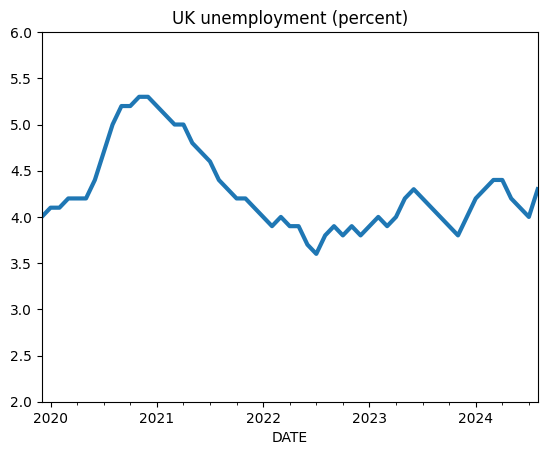

In [5]:
import pandas_datareader.data as web

df_u = web.DataReader("LRHUTTTTGBM156S", "fred")

df_u.plot(title="UK unemployment (percent)", legend=False, ylim=(2, 6), lw=3.0)

In [6]:
import pandas as pd
import requests

url = "https://databank.worldbank.org/source/millennium-development-goals/Series/EN.ATM.CO2E.KT"
html = requests.get(url).content
df = pd.read_html(html)[0]
print(df.columns)

Index(['Indicator', 'Rule', 'Weighted Indicator', '%'], dtype='object')


First, I went to Getting Data-Coding for Economists based on the code, but could not get the data. Then, I went to https://datacatalog.worldbank.org/indicator/b66c366b-bdce-eb11-bacc-000d3a596ff0/CO2-emissions--metric-tons-per-capita. this site to get the Data and the page keeps reporting an error:
An error occurs.
This could be due to

Our network is unusually busy
The server is currently unavailable
Please try again later or contact data@worldbank.org

Error ID: 9bcb1bcd7bd91946aaddafba37719f72. So I can only use excel sheet.

In [7]:
import pandas as pd

# 读取Excel文件，假设数据在第一个工作表
df = pd.read_excel('data\EN.ATM.CO2E.PC.xlsx')

# 重命名列（如果需要），确保列名与你的要求一致，这里假设原始列名分别为'Country Name'、'Year'、'EN.ATM.CO2E.KT'
df.rename(columns={'Country Name': 'country', 'Year': 'year', 'EN.ATM.CO2E.KT': 'EN.ATM.CO2E.PC'}, inplace=True)

# 选择需要的列并按照人均二氧化碳排放量排序
selected_data = df[['country', 'year', 'EN.ATM.CO2E.PC']].sort_values('EN.ATM.CO2E.PC')

# 显示处理后的数据表格
print(selected_data)

                   country  year  EN.ATM.CO2E.PC
0                    India  2017        1.704927
1     East Asia\n& Pacific  2017        5.960076
2  Europe &\nCentral\nAsia  2017        6.746232
3                    China  2017        7.226160
4           United\nStates  2017       14.823245


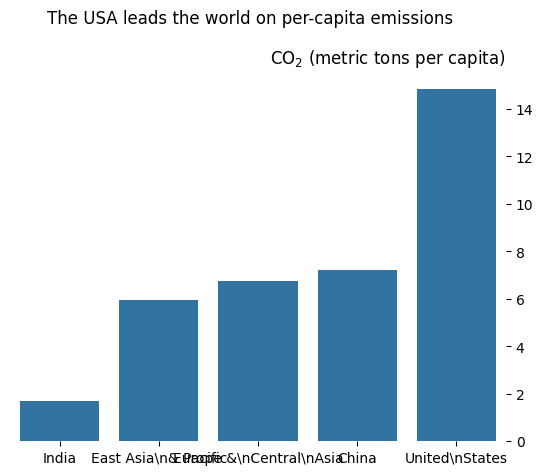

In [8]:
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(x="country", y="EN.ATM.CO2E.PC", data=df.reset_index(), ax=ax)
ax.set_title(r"CO$_2$ (metric tons per capita)", loc="right")
plt.suptitle("The USA leads the world on per-capita emissions", y=1.01)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_ylabel("")
ax.set_xlabel("")
ax.yaxis.tick_right()
plt.show()

For this link: https://stats.oecd.org/SDMX-JSON/data/PDB_LV/GBR+FRA+CAN+ITA+DEU+JPN+USA.T_GDPEMP.CPC/all?startTime=2010 can no longer be found.404 - File or directory not found.
The resource you are looking for may have been deleted, renamed, or is temporarily unavailable.

In [9]:
url = "http://aeturrell.com/research"
page = requests.get(url)
page.text[:300]

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en"><head>\n\n<meta charset="utf-8">\n<meta name="generator" content="quarto-1.5.56">\n\n<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes">\n\n<meta name="author" content="Arthur Turrell">\n'

In [10]:
soup = BeautifulSoup(page.text, "html.parser")
print(soup.prettify()[60000:60500])

       </div>
          <div class="project-category">
           <a href="#category=gender pay gap">
            gender pay gap
           </a>
          </div>
          <div class="project-category">
           <a href="#category=labour">
            labour
           </a>
          </div>
          <div class="project-category">
           <a href="#category=text analysis">
            text analysis
           </a>
          </div>
         </div>
         <div class="project-details-listing


In [11]:
# Get all paragraphs
all_paras = soup.find_all("p")
# Just show one of the paras
all_paras[1]

<p>Botta, Federico, Robin Lovelace, Laura Gilbert, and Arthur Turrell. "Packaging code and data for reproducible research: A case study of journey time statistics." <i>Environment and Planning B: Urban Analytics and City Science</i> (2024): 23998083241267331. doi: <a href="https://doi.org/10.1177/23998083241267331"><code>10.1177/23998083241267331</code></a></p>

In [12]:
all_paras[1].text

'Botta, Federico, Robin Lovelace, Laura Gilbert, and Arthur Turrell. "Packaging code and data for reproducible research: A case study of journey time statistics." Environment and Planning B: Urban Analytics and City Science (2024): 23998083241267331. doi: 10.1177/23998083241267331'

In [13]:
projects = soup.find_all("div", class_="project-content listing-pub-info")
projects = [x.text.strip() for x in projects]
projects[:4]

['Botta, Federico, Robin Lovelace, Laura Gilbert, and Arthur Turrell. "Packaging code and data for reproducible research: A case study of journey time statistics." Environment and Planning B: Urban Analytics and City Science (2024): 23998083241267331. doi: 10.1177/23998083241267331',
 'Kalamara, Eleni, Arthur Turrell, Chris Redl, George Kapetanios, and Sujit Kapadia. "Making text count: economic forecasting using newspaper text." Journal of Applied Econometrics 37, no. 5 (2022): 896-919. doi: 10.1002/jae.2907',
 'Turrell, A., Speigner, B., Copple, D., Djumalieva, J. and Thurgood, J., 2021. Is the UK’s productivity puzzle mostly driven by occupational mismatch? An analysis using big data on job vacancies. Labour Economics, 71, p.102013. doi: 10.1016/j.labeco.2021.102013',
 'Haldane, Andrew G., and Arthur E. Turrell. "Drawing on different disciplines: macroeconomic agent-based models." Journal of Evolutionary Economics 29 (2019): 39-66. doi: 10.1007/s00191-018-0557-5']

In [14]:
import requests
from bs4 import BeautifulSoup

def scraper(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # 检查请求是否成功，若不成功则抛出异常
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup.title.string if soup.title else "No title found"
    except requests.RequestException as e:
        print(f"Error fetching page {url}: {e}")
        return None

start, stop = 0, 50
root_url = "www.codingforeconomists.com/page="
info_on_pages = []
for i in range(start, stop):
    url = root_url + str(i)
    info = scraper(url)
    info_on_pages.append(info)

print(info_on_pages)


Error fetching page www.codingforeconomists.com/page=0: Invalid URL 'www.codingforeconomists.com/page=0': No scheme supplied. Perhaps you meant https://www.codingforeconomists.com/page=0?
Error fetching page www.codingforeconomists.com/page=1: Invalid URL 'www.codingforeconomists.com/page=1': No scheme supplied. Perhaps you meant https://www.codingforeconomists.com/page=1?
Error fetching page www.codingforeconomists.com/page=2: Invalid URL 'www.codingforeconomists.com/page=2': No scheme supplied. Perhaps you meant https://www.codingforeconomists.com/page=2?
Error fetching page www.codingforeconomists.com/page=3: Invalid URL 'www.codingforeconomists.com/page=3': No scheme supplied. Perhaps you meant https://www.codingforeconomists.com/page=3?
Error fetching page www.codingforeconomists.com/page=4: Invalid URL 'www.codingforeconomists.com/page=4': No scheme supplied. Perhaps you meant https://www.codingforeconomists.com/page=4?
Error fetching page www.codingforeconomists.com/page=5: Inva

In [15]:
df_list = pd.read_html(
    "https://simple.wikipedia.org/wiki/FIFA_World_Cup", match="Sweden"
)
# Retrieve first and only entry from list of dataframes
df = df_list[0]
df.head()

,Years,Hosts,Winners,Score,Runner's-up,Third place,Score.1,Fourth place
0,1930 Details,Uruguay,Uruguay,4 - 2,Argentina,United States,[note 1],Yugoslavia
1,1934 Details,Italy,Italy,2 - 1,Czechoslovakia,Germany,3 - 2,Austria
2,1938 Details,France,Italy,4 - 2,Hungary,Brazil,4 - 2,Sweden
3,1950 Details,Brazil,Uruguay,2 - 1,Brazil,Sweden,[note 2],Spain
4,1954 Details,Switzerland,West Germany,3 - 2,Hungary,Austria,3 - 1,Uruguay


pdf part

In [16]:
import PyPDF2
from pathlib import Path

def read_pdf_text(file_path):
    text = ""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

pdf_file_path = Path("data/pdf_with_table.pdf")
pdf_text = read_pdf_text(pdf_file_path)
print(pdf_text[:220])

3 
 2 Quantifying Fuel -Saving Opportunit ies from Specific Driving 
Behavior Changes  
2.1 Savings from Improving Individual Driving  Profiles  
2.1.1  Drive Profile Subsample from Real -World Travel Survey  
The interi


In [17]:
import tabula
import os

# 设置 PDF 文件路径
pdf_path = os.path.join('data', 'pdf_with_table.pdf')

# 使用 tabula 读取 PDF 中的表格数据
tables = tabula.read_pdf(pdf_path, pages='all')

# 打印第一个表格的数据（你可以根据实际需求修改处理方式）
if len(tables) > 0:
    print(tables[0])

Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'


  Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Percent Fuel Savings Unnamed: 4
0      Cycle         KI   Distance        NaN                  NaN        NaN
1       Name     (1/km)       (mi)   Improved  Decreased Eliminate  Decreased
2        NaN        NaN        NaN      Speed          Accel Stops       Idle
3     2012_2       3.30        1.3       5.9%           9.5% 29.2%      17.4%
4     2145_1       0.68       11.2       2.4%            0.1% 9.5%       2.7%
5     4234_1       0.59       58.7       8.5%            1.3% 8.5%       3.3%
6     2032_2       0.17       57.8      21.7%            0.3% 2.7%       1.2%
7     4171_1       0.07      173.9      58.1%            1.6% 2.1%       0.5%
